<a href="https://colab.research.google.com/github/expeditive/machine-learning/blob/main/project/Big_Mart_Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Mart Sales Predcition**

The **Big Mart Sales Prediction Project** is a common machine learning project aimed at predicting the sales of various products across Big Mart outlets using historical sales data. It’s a great real-world project for beginners learning data science and machine learning.

---

### 📊 **Objective**

To **predict the sales of products** (Item Outlet Sales) at various Big Mart stores based on features like product type, store type, location, MRP, visibility, etc.

---

### 📁 **Typical Dataset Structure**

The dataset usually contains two files:

* **Train.csv** – includes sales data for model training.
* **Test.csv** – without sales, to be predicted.

Common features:

| Feature                     | Description                            |
| --------------------------- | -------------------------------------- |
| Item\_Identifier            | Unique ID for each product             |
| Item\_Weight                | Weight of the product                  |
| Item\_Fat\_Content          | Low Fat or Regular                     |
| Item\_Visibility            | Visibility of the product in the store |
| Item\_Type                  | Type of product (e.g., Dairy, Snacks)  |
| Item\_MRP                   | Maximum Retail Price                   |
| Outlet\_Identifier          | Unique ID of store                     |
| Outlet\_Establishment\_Year | Year the store was established         |
| Outlet\_Size                | Size of the store (Small/Medium/Large) |
| Outlet\_Location\_Type      | Tier 1, 2, or 3 city                   |
| Outlet\_Type                | Grocery store or supermarket           |
| **Item\_Outlet\_Sales**     | 🔴 **Target Variable**                 |

---

### 🧠 **Steps Involved**

1. **Data Cleaning**

   * Handling missing values (e.g., Item\_Weight, Outlet\_Size)
   * Fixing inconsistent categories (e.g., Fat\_Content variations)

2. **Exploratory Data Analysis (EDA)**

   * Understanding relationships between features and sales.
   * Visualizations: histograms, boxplots, heatmaps, etc.

3. **Feature Engineering**

   * Converting categorical to numerical (Label Encoding or One-Hot Encoding)
   * Creating new features (e.g., Item\_Category from Item\_Identifier)

4. **Model Building**

   * Algorithms: Linear Regression, Decision Tree, Random Forest, XGBoost, etc.
   * Evaluation metric: **R² Score** or **RMSE** on validation data.

5. **Hyperparameter Tuning**

   * Using GridSearchCV or RandomizedSearchCV for best model performance.

6. **Prediction and Submission**

   * Generate predictions for the test dataset and prepare a CSV for submission.

---

### 🛠️ **Tools & Libraries Used**

* Python
* Pandas, NumPy (Data manipulation)
* Matplotlib, Seaborn (Visualization)
* Scikit-learn, XGBoost (ML models)

---

### 📌 Use Cases / Learning Outcomes

* Handling real-world messy data.
* Performing EDA and feature engineering.
* Understanding regression models and tuning them.
* Building a complete ML pipeline from scratch.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data collection and analysis

In [2]:
#loading the dataset from csv to pandas dataframe
big_mart_data = pd.read_csv('/content/Train_bigmartsales.csv')

In [3]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#no. of data points and number of features
big_mart_data.shape

(8523, 12)

In [5]:
#getting some imfo about dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


categorical features


-Item_Identifier

-Item_Fat_Content

-Item_Type

-Outlet_Identifier

-Outlet_Size

-Outlet_location_Type

-Outlet_Type

In [6]:
#checking the missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Handling missing Values

mean--> average value

mode --> most repeatedva value

Replacing the missing values in Item_weight column with mean

In [7]:
#mean value of Item_Wieght column
big_mart_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [8]:
#filling themissing values in Item_Weight column with mean value

big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace = True)

<ipython-input-8-c6fec264b5ef>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace = True)


In [9]:
big_mart_data['Item_Weight'] = big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean())


In [10]:
#checking again for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Replacing the missing values in Outlet_Size column with mode

In [16]:
# Step 1: Find missing values
missing_values = big_mart_data['Outlet_Size'].isnull()

# Step 2: Get mode of Outlet_Size for each Outlet_Type
mode_of_Outlet_size = big_mart_data.groupby('Outlet_Type')['Outlet_Size'].agg(lambda x: x.mode()[0])

# Step 3: Fill missing Outlet_Size using the mode based on Outlet_Type
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].map(mode_of_Outlet_size)


In [17]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [18]:
print(mode_of_Outlet_size)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object


In [19]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Data Analysis

In [20]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features


<ipython-input-21-992bb522ebd3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


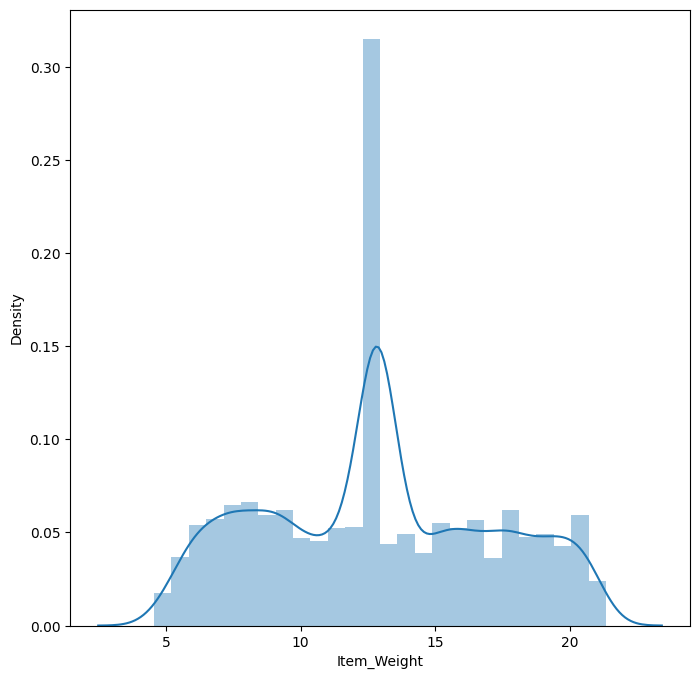

In [21]:
#item weight distribution
plt.figure(figsize=(8,8))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()


<ipython-input-22-e48e8fd68b22>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


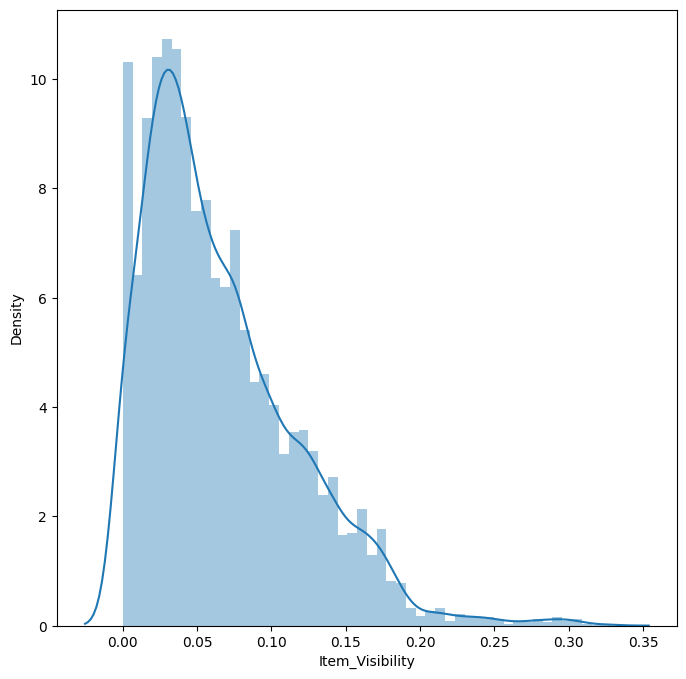

In [22]:
#item visibility distribution
plt.figure(figsize=(8,8))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()


<ipython-input-23-c8e027b916dc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


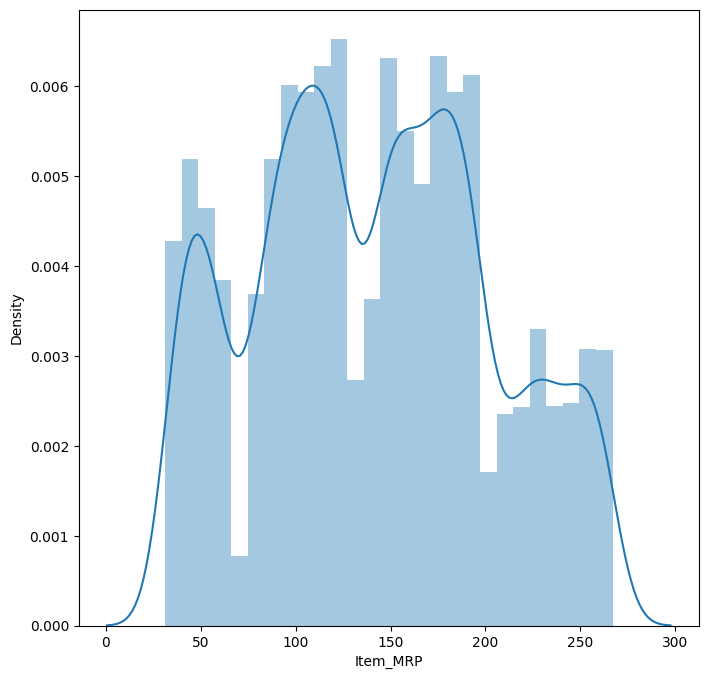

In [23]:
#item_MRP distribution
plt.figure(figsize=(8,8))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

<ipython-input-24-ae11f43f3d20>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


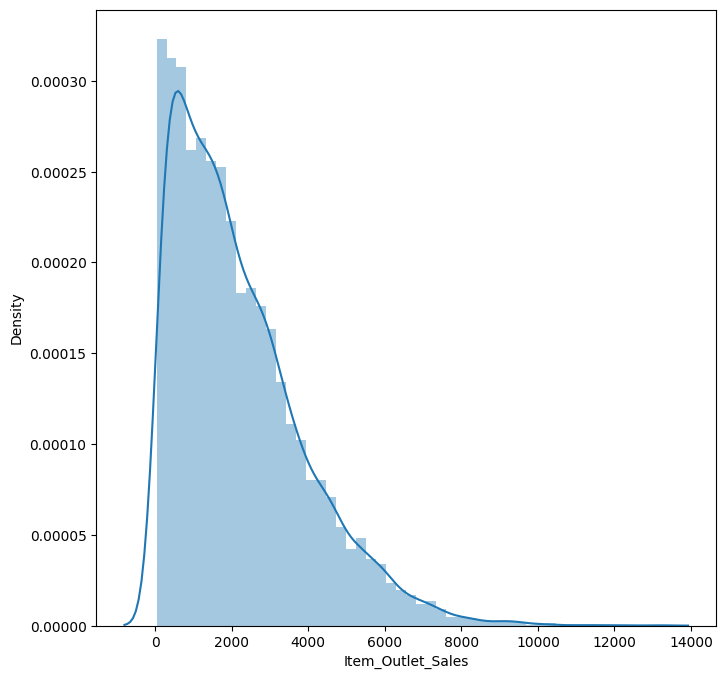

In [24]:
#item sales distribution
plt.figure(figsize=(8,8))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

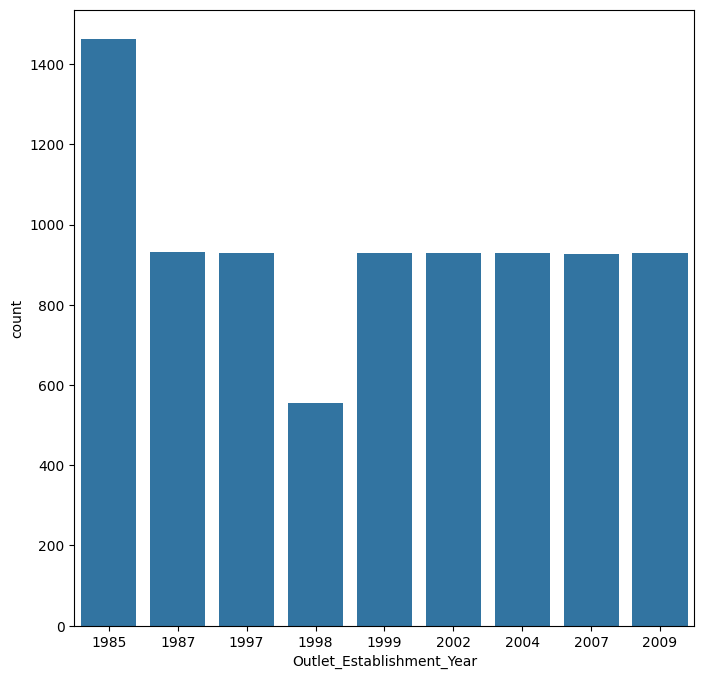

In [25]:
#Outlet_Establishment_year distribution
plt.figure(figsize=(8,8))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

categorical Features

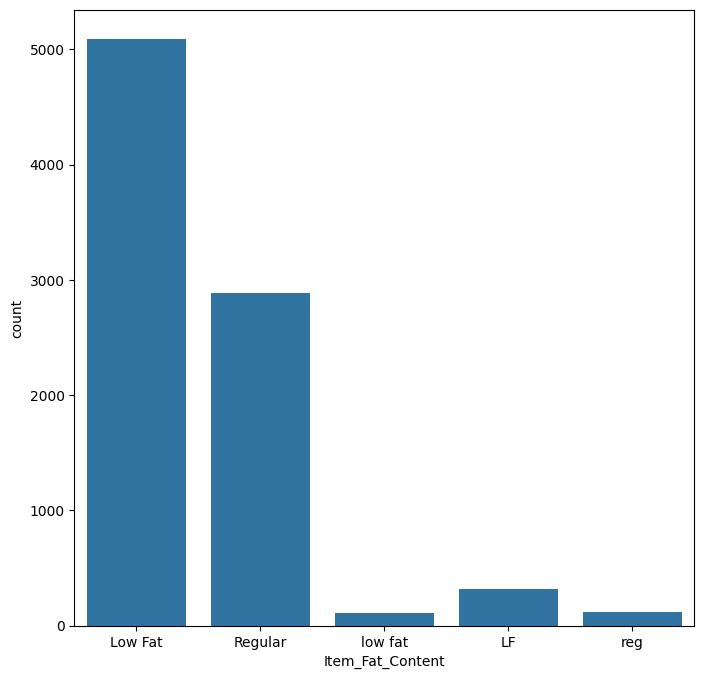

In [26]:
#Item_Fat_Content distribution
plt.figure(figsize=(8,8))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

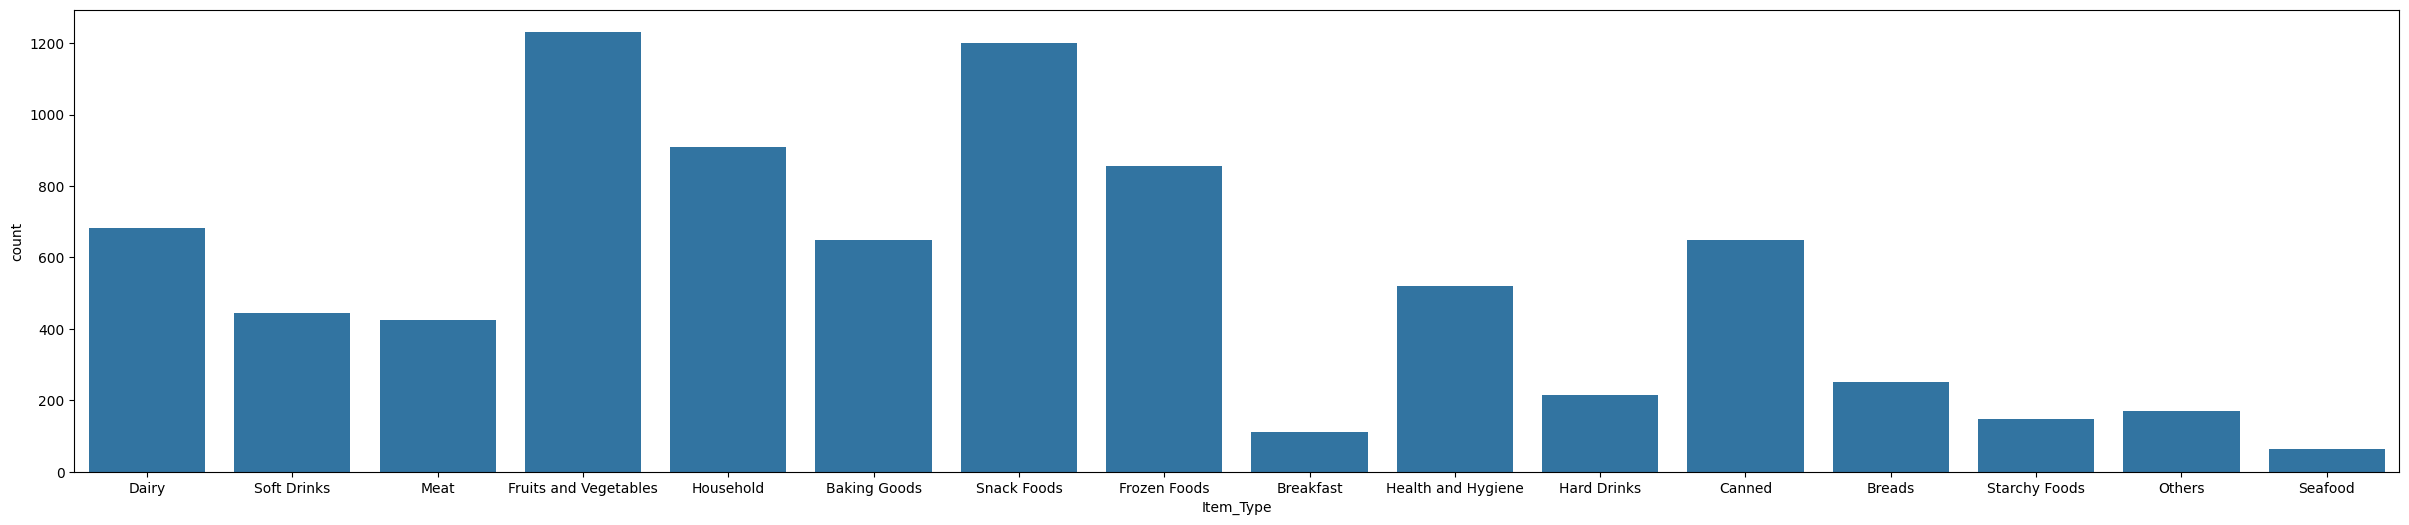

In [27]:
#Item_Type_column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data = big_mart_data)
plt.show()

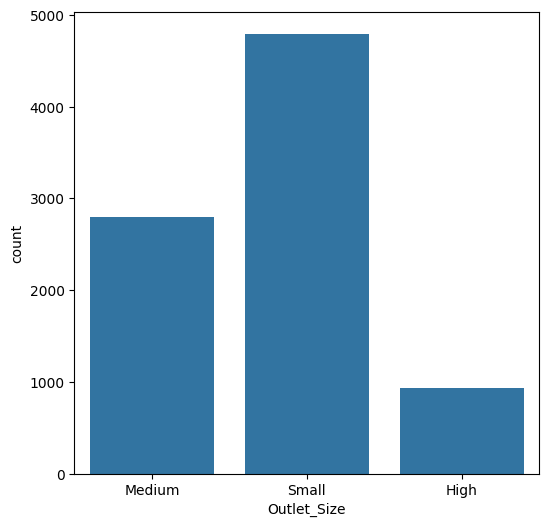

In [28]:
#Item_Type_column


plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data = big_mart_data)
plt.show()

In [29]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [30]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace = True)

In [31]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


Label Encoding

In [32]:
encoder = LabelEncoder()

In [33]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [34]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


splitting features and taget

In [35]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis = 1)
Y = big_mart_data['Item_Outlet_Sales']

In [36]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [37]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


splitting the data into training and testing

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state =2)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# **model training**

In [40]:
regressor = XGBRegressor()

In [41]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# **Evaluation**

In [42]:
#prediction on trainig data
training_data_prediction = regressor.predict(X_train)

In [43]:
#R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [44]:
print('R squared value -->', r2_train)

R squared value --> 0.8762174618111388


In [45]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)



In [46]:
r2_test = metrics.r2_score(Y_test,test_data_prediction)

In [47]:
print('R squared value -->', r2_test)

R squared value --> 0.5017253991620692
